# Testing single muscle and neuron models

February 24th, 2017

Stephen Larson

Here we show a few examples of testing the latest configurations of the muscle model and a neuron model.  We'll first look at an example running a muscle and a neuron that are not connected, and we'll put input into just the muscle.  Then we'll look at an example where the muscle and the neuron have a synapse in between them, we stimulate the neuron, and the muscle gets stimulated.

## Boilerplate
First, some boilerplate imports and magic.  We're going to be using the 'runAndPlot' method to run c302 with just a set of parameters.  Be sure to only run the first cell once!

In [1]:
import os
import sys
os.chdir("..") 
from runAndPlot import run_c302
%matplotlib inline

## Running a current clamp on the muscle model

Next we are going to start off by just running the simplest version of the muscle model.  

We're calling this using the code `IClampBWM` which is standing in for "Current Clamp of the Body Wall Muscle".  The details of how the current clamp is configured is in the file "c302_IClampBWM.py".  

We are using parameters "C2" which corresponds to a variant on the conductance-based model version, which is pulling from "parameters_C2.py" in the c302 directory.  

Then the model is simulated for 1000 steps at a 0.05 timestep.  We will use "jNeuroML_NEURON" which means we'll be simulating this with the jNeuroML interface to the NEURON simulation engine.   

Here we go:

********************

   Going to generate c302_C2_IClampBWM and run for 1000 on jNeuroML_NEURON

********************
Set default parameters for C
Set default parameters for C2
Opened file: /home/developer/forks/CElegansNeuroML/CElegans/pythonScripts/c302/../../../herm_full_edgelist.csv
Opened file: /home/developer/forks/CElegansNeuroML/CElegans/pythonScripts/c302/../../../herm_full_edgelist.csv
c302      >>>  Positioning muscle: MDR01 at (80,-270,80)
c302      >>>  Writing generated network to: /home/developer/forks/CElegansNeuroML/CElegans/pythonScripts/c302/examples/c302_C2_IClampBWM.nml
Validating examples/c302_C2_IClampBWM.nml against /usr/local/lib/python2.7/dist-packages/neuroml/nml/NeuroML_v2beta4.xsd
It's valid!
(Re)written network file to: examples/c302_C2_IClampBWM.nml
c302      >>>  Finished simulation of LEMS_c302_C2_IClampBWM.xml and have reloaded results
c302      >>>  Reloaded data: ['MDR01/0/GenericMuscleCell/caConc', 'AVAL/0/GenericNeuronCell/caConc', 'MDR01/0/Generi

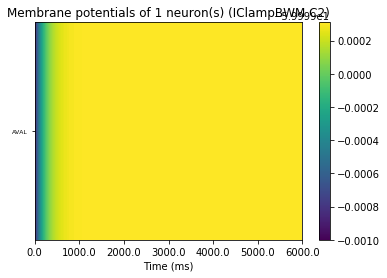

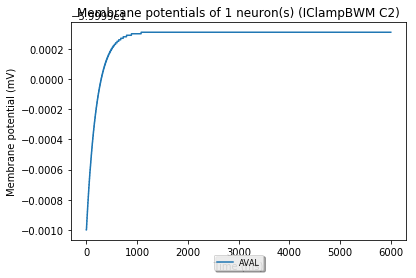

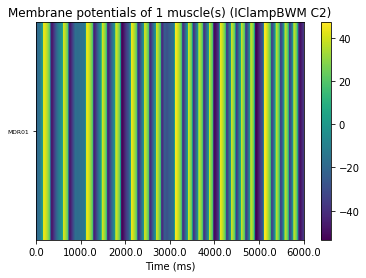

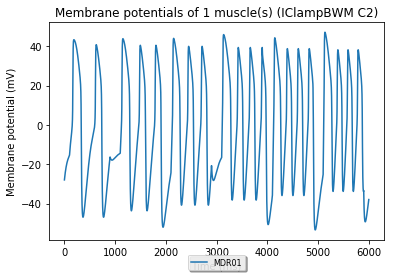

In [2]:
cells, cells_to_stimulate, params, muscles = run_c302('IClampBWM','C2','',1000,0.05,'jNeuroML_NEURON',verbose=False,plot_ca=False, data_reader="UpdatedSpreadsheetDataReader", config_package="notebooks.configs")

### Interpreting the results

We get four graphs out.  The first two show output from a neuron that has been put into the model, AVAL.  

The second two correspond to output from a muscle cell, MDR01.

Each pair of graphs are showing two aspects of the membrane potential of the cell they are looking at, both a heat plot and a line graph.  The two plots are showing the same data, just with different visualizations.

Given these outputs, I'm not sure that the AVAL neuron is being stimulated at all.  Having a look at the "c302_IClampBWM.py" file, I see the following lines:

```python
for i in range(len(stim_amplitudes)):
    start = "%sms"%(i*1000 + 100)
    for c in muscles_to_include:
        c302.add_new_input(nml_doc, c, start, "800ms", stim_amplitudes[i], params)
```

These are the lines where the current clamp is actually set up.  But since the loop only goes over "muscles_to_include", I think AVAL is not being included in getting stimulated.

That's OK -- because the graph for AVAL also suggests that it isn't receiving input.  That checks out.

However, it looks like the muscle cell model is receiving input and it is creating spikes.  Cool. 

### Biological parameters used

Next we can check out what the biological parameters that were used in this run were:

In [3]:
print params.bioparameter_info("  ")

  Known BioParameters:
    BioParameter: cell_diameter = 5 (SRC: BlindGuess, certainty 0.1)
    BioParameter: muscle_length = 20 (SRC: BlindGuess, certainty 0.1)
    BioParameter: initial_memb_pot = -60 mV (SRC: BlindGuess, certainty 0.1)
    BioParameter: muscle_initial_memb_pot = -28 mV (SRC: BlindGuess, certainty 0.1)
    BioParameter: specific_capacitance = 1 uF_per_cm2 (SRC: BlindGuess, certainty 0.1)
    BioParameter: muscle_specific_capacitance = 1 uF_per_cm2 (SRC: BlindGuess, certainty 0.1)
    BioParameter: neuron_spike_thresh = -55 mV (SRC: BlindGuess, certainty 0.1)
    BioParameter: muscle_spike_thresh = -10 mV (SRC: BlindGuess, certainty 0.1)
    BioParameter: muscle_leak_cond_density = 0.0172 mS_per_cm2 (SRC: BlindGuess, certainty 0.1)
    BioParameter: neuron_leak_cond_density = 0.002 mS_per_cm2 (SRC: BlindGuess, certainty 0.1)
    BioParameter: leak_erev = -60 mV (SRC: BlindGuess, certainty 0.1)
    BioParameter: muscle_leak_erev = -13 mV (SRC: BlindGuess, certainty 0.1

There are actually more parameers in here than meets the eye, because there are also neuron-to-muscle and muscle-to-muscle synaptic parameters which don't play a role in generating our output but that's also OK.  We can see that there are muscle and neuron ion channel parameters that are playing a role here.

## Connecting the neuron and the muscle

Now let's run an example where we actually do have a synapse between the neuron and the muscle.

Much of what we had before stays the same, with the change that now we are running the NMJ configuration of the model, which stands for "Neuromuscular junction", a name for the synapse between a neuron and a muscle, which is stored in "c302_NMJ.py".  

In this case we are applying a similar current clamp input as the first time, but we are doing it into only the neuron and not the muscle.  Also, the neuron is now VB1, a motor neuron, and the muscle is MVL07.

********************

   Going to generate c302_C2_NMJ and run for 1000 on jNeuroML_NEURON

********************
Set default parameters for C
Set default parameters for C2
Opened file: /home/developer/forks/CElegansNeuroML/CElegans/pythonScripts/c302/../../../herm_full_edgelist.csv
Opened file: /home/developer/forks/CElegansNeuroML/CElegans/pythonScripts/c302/../../../herm_full_edgelist.csv
c302      >>>  Positioning muscle: MVL07 at (-80,-90,-80)
VB1-MVL07 2 exc Acetylcholine
c302      >>>  Writing generated network to: /home/developer/forks/CElegansNeuroML/CElegans/pythonScripts/c302/examples/c302_C2_NMJ.nml
Validating examples/c302_C2_NMJ.nml against /usr/local/lib/python2.7/dist-packages/neuroml/nml/NeuroML_v2beta4.xsd
It's valid!
(Re)written network file to: examples/c302_C2_NMJ.nml
c302      >>>  Finished simulation of LEMS_c302_C2_NMJ.xml and have reloaded results
c302      >>>  Reloaded data: ['VB1/0/GenericNeuronCell/v', 'MVL07/0/GenericMuscleCell/v', 'VB1/0/GenericNeuronCell/

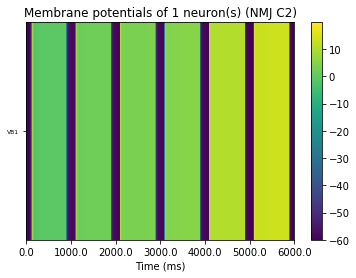

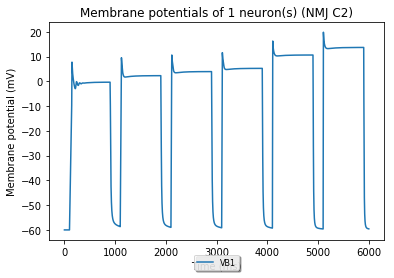

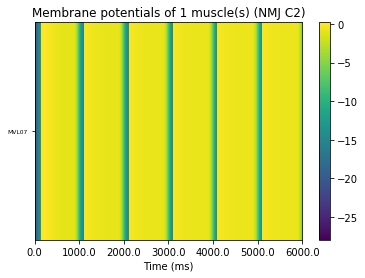

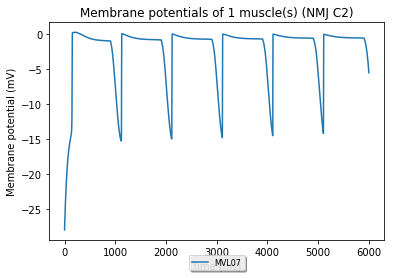

In [4]:
cells, cells_to_stimulate, params, muscles = run_c302('NMJ','C2','',1000,0.05,'jNeuroML_NEURON',verbose=False,plot_ca=False, data_reader="UpdatedSpreadsheetDataReader", config_package="notebooks.configs")

### Interpreting the results

The plots follow the same pattern as above, the first two from the neuron and the second two from the muscle.

Observing the results, there is stepped input that is coming into the muscle cell from the neuron, that can only be getting there by passing through a synapse.  In fact the log output told us this above where it says `VB1-MVL07 2 exc Acetylcholine`


While the output of the neuron ramps up to higher and higher membrane potential, the synapse filters that out and the muscle only responds to the change in input it is receiving.

Since the "C2" configuration was used, the biological parameters are the same as we saw earlier.

## Conclusions so far and next steps

At this point we are able to see some basic simulations working.  Even though we know the parameters that are used are still rather unphysiologically realistic, we are able to see that the tools that we are using are giving us results that match our expectations.

A next step with this set up would be to flesh this notebook out with examples of the real recordings that come out from papers that have made recordings from the real cells in almost exactly this kind of setup.